In [7]:
import pandas as pd
df = pd.read_csv('stroke_data.csv')
# 1 = male, 0 = female
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes
# 1 = married, 0 = unmarried
df['ever_married'] = df['ever_married'].astype('category')
df['ever_married'] = df['ever_married'].cat.codes
# 2 = private, 4 = children
df['work_type'] = df['work_type'].astype('category')
df['work_type'] = df['work_type'].cat.codes
# 1 = urban, 0 = rural
df['Residence_type'] = df['Residence_type'].astype('category')
df['Residence_type'] = df['Residence_type'].cat.codes
# 0 = never smoked, 1 = formerly smoked, 2 = smokes
df['smoking_status'] = df['smoking_status'].astype('category')
df['smoking_status'] = df['smoking_status'].cat.codes
df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,59993,1,40,0,0,1,2,0,60.96,11.5,1,0
1,28309,0,67,0,0,1,2,1,82.09,14.1,1,0
2,13173,1,70,1,0,1,2,1,214.77,15.0,0,0
3,46436,1,13,0,0,0,4,1,122.31,15.3,1,0
4,70823,0,10,0,0,0,4,1,57.28,15.4,1,0


<Axes: xlabel='stroke', ylabel='count'>

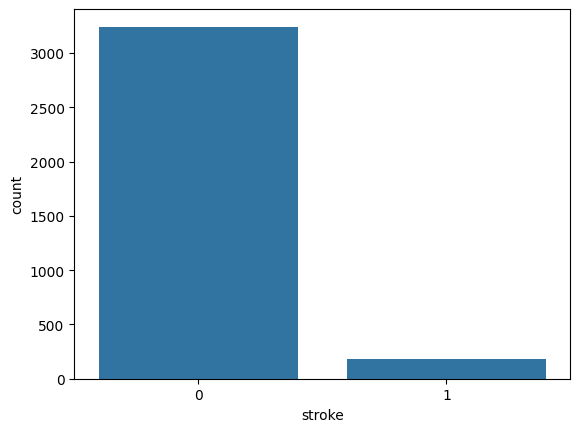

In [25]:
import seaborn as sns
sns.countplot(x='stroke', data=df)

In [6]:
X = df.drop('stroke', axis=1)
X
y = df['stroke']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [9]:
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1874,38617,1,28,0,0,1,3,1,73.98,29.9,1
3094,29552,0,55,1,1,1,2,1,210.40,40.0,2
776,54400,0,62,0,0,1,3,0,128.61,24.8,1
2087,62272,0,78,0,0,1,2,1,119.03,31.0,1
2603,30752,0,42,0,0,0,3,1,72.00,34.4,1
...,...,...,...,...,...,...,...,...,...,...,...
1095,40371,0,47,0,0,1,2,1,62.47,26.5,1
1130,25811,0,61,0,0,1,2,1,98.35,26.6,1
1294,35330,1,30,0,0,1,2,1,81.25,27.3,2
860,72082,0,45,0,0,1,3,0,69.76,25.3,2


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[ 0.06330183,  1.23997597, -1.10727048, ..., -0.71679279,
        -0.06452189,  0.03820821],
       [-0.36587442, -0.80400609,  0.32839806, ...,  2.15485592,
         1.35823193,  1.51164606],
       [ 0.8105372 , -0.80400609,  0.70060842, ...,  0.4331718 ,
        -0.78294214,  0.03820821],
       ...,
       [-0.09231895,  1.23997597, -1.00092466, ..., -0.56375888,
        -0.43077535,  1.51164606],
       [ 1.64767943, -0.80400609, -0.20333103, ..., -0.80562403,
        -0.71250878,  1.51164606],
       [ 0.93240147, -0.80400609, -0.57554139, ..., -0.78120596,
         1.58361867,  0.03820821]])

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9605839416058394

In [27]:
X_train.shape


(2738, 11)

In [29]:
X_test.shape

(685, 11)

In [16]:
log_reg.score(X_train, y_train)

0.9441197954711468

In [20]:
log_reg1 = LogisticRegression(random_state=0,
                              fit_intercept=True,
                              ).fit(X_train, y_train)


In [21]:
log_reg1.score(X_train, y_train)

0.9441197954711468

In [22]:
log_reg1.score(X_test, y_test)

0.9605839416058394

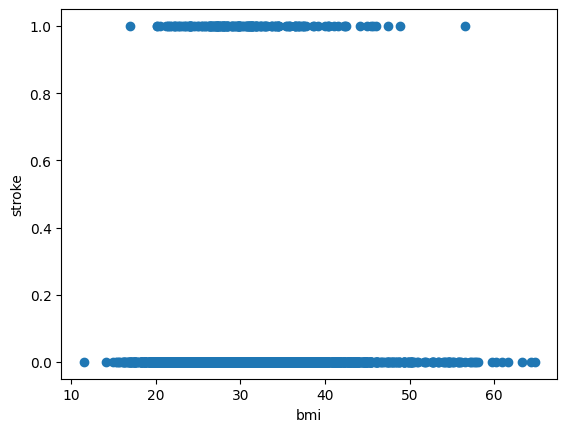

In [24]:
from matplotlib import pyplot as plt
plt.scatter(df.bmi, df.stroke)
plt.xlabel('bmi')
plt.ylabel('stroke')
plt.show()

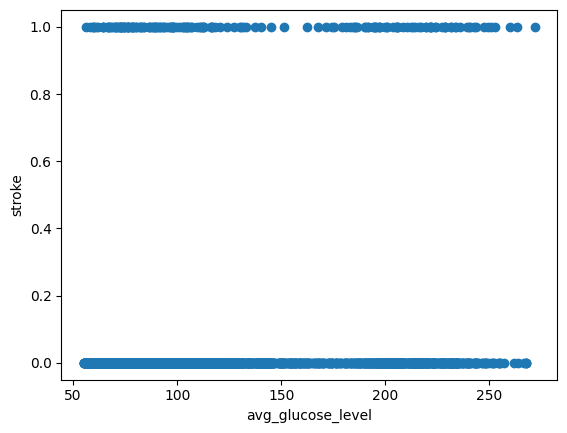

In [35]:

plt.scatter(df.avg_glucose_level, df.stroke)
plt.xlabel('avg_glucose_level')
plt.ylabel('stroke')
plt.show()

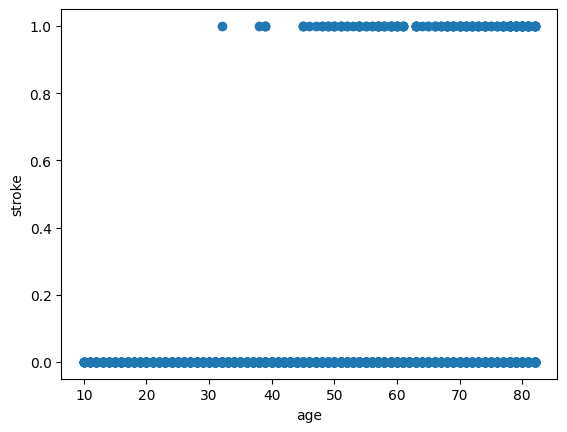

In [36]:

plt.scatter(df.age, df.stroke)
plt.xlabel('age')
plt.ylabel('stroke')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[658   1]
 [ 26   0]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       659
           1       0.00      0.00      0.00        26

    accuracy                           0.96       685
   macro avg       0.48      0.50      0.49       685
weighted avg       0.93      0.96      0.94       685

